In [1]:
from os import listdir
from os.path import isfile, join
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import webcolors
from PIL import Image
import pytesseract

In [2]:
mypath = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\Simon_Resources\pics_from_tello_pov"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['frame0.jpg', 'frame1.jpg', 'frame10.jpg', 'frame100.jpg', 'frame101.jpg', 'frame102.jpg', 'frame103.jpg', 'frame104.jpg', 'frame105.jpg', 'frame106.jpg', 'frame107.jpg', 'frame108.jpg', 'frame109.jpg', 'frame11.jpg', 'frame110.jpg', 'frame111.jpg', 'frame112.jpg', 'frame113.jpg', 'frame114.jpg', 'frame115.jpg', 'frame116.jpg', 'frame117.jpg', 'frame118.jpg', 'frame119.jpg', 'frame12.jpg', 'frame120.jpg', 'frame121.jpg', 'frame122.jpg', 'frame123.jpg', 'frame124.jpg', 'frame125.jpg', 'frame126.jpg', 'frame127.jpg', 'frame128.jpg', 'frame129.jpg', 'frame13.jpg', 'frame130.jpg', 'frame131.jpg', 'frame132.jpg', 'frame133.jpg', 'frame134.jpg', 'frame135.jpg', 'frame136.jpg', 'frame137.jpg', 'frame138.jpg', 'frame139.jpg', 'frame14.jpg', 'frame140.jpg', 'frame141.jpg', 'frame142.jpg', 'frame143.jpg', 'frame144.jpg', 'frame145.jpg', 'frame146.jpg', 'frame147.jpg', 'frame148.jpg', 'frame149.jpg', 'frame15.jpg', 'frame150.jpg', 'frame151.jpg', 'frame152.jpg', 'frame153.jpg', 'frame154.jpg', '

In [3]:
        
def PlotCv2ImageWithPlt(image, name = "no name"):
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img, interpolation='none')
    plt.title(name)
    plt.show()
    
def ReadFileFun(file_name , dir_name):
    img = cv2.imread(dir_name + file_name)
    #PlotCv2ImageWithPlt(img, "original image "+ str(file_name))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    dst = cv2.Canny(gray, 0, 150)
    blured = cv2.blur(dst, (5,5), 0)    
    MIN_CONTOUR_AREA=800 # 1200
    img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    i = 0;
    for contour in Contours:
        (xc,yc,w,h) = cv2.boundingRect(contour)
        if (w > 200) and (h >200) and (yc > 1) and (xc > 1) and (1.8*h>w>1.3*h):
            i += 1
            print (f"xc {xc}, yc {yc}, w {w}, h {h}")
            cropped_image = img[yc:yc+h,xc:xc+w]
            PlotCv2ImageWithPlt(img, "original image "+ str(file_name))
            PlotCv2ImageWithPlt(cropped_image, "screen image" + str(file_name))
            
def GetColorName(rgb_triplet):
    min_colours = {}
    for name, key in mc.CSS4_COLORS.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]


def CompareMainColorDistance(cropped_image , rgb_triplet):
    tuple(img[int(yc+h/2), int(xc+w/2)])
    
    


def get_dominant_color(file_full_path,bb, palette_size=16):
    # Resize image to speed up processing
    pil_img = Image.open(file_full_path)
    #img = pil_img[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2]].copy()
    img = pil_img.crop((bb[0], bb[1], bb[0]+bb[2], bb[1]+bb[3]))
    img.thumbnail((100, 100))

    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    palette_index = color_counts[0][1]
    dominant_color = palette[palette_index*3:palette_index*3+3]
    return dominant_color

def get_dominant_color2(cv2_img,bb, palette_size=16):
    # Resize image to speed up processing
    color_coverted = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(color_coverted)
    #pil_img.show()
    img = pil_img.copy()
    #img = pil_img.crop((bb[0], bb[1], bb[0]+bb[2], bb[1]+bb[3]))
    img.thumbnail((100, 100))

    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    palette_index = color_counts[0][1]
    dominant_color = palette[palette_index*3:palette_index*3+3]
    return dominant_color



def DistanceBetweenTwoTuples(tuple1,tuple2):
    xx = (tuple1[0] - tuple2[0])**2
    yy = (tuple1[1] - tuple2[1])**2
    zz = (tuple1[2] - tuple2[2])**2
    return np.sqrt(xx+yy+zz)    

In [4]:
path_to_file = mypath + r"/" +str(onlyfiles[0])
file_exists = exists(path_to_file)
print(file_exists)

True


In [171]:
finished = False
frame_count = 0
maxcountt = 42
maxcount = min(maxcountt, len(onlyfiles) -1)
while not finished and frame_count+1 < maxcount:
    frame_name = r"\frame" + str(frame_count) + ".jpg"
    print(frame_name)
    frame_count += 1
    if exists(mypath + frame_name):
        ReadFileFun(frame_name , mypath)
    else:
        finished = True

SyntaxError: invalid syntax (<ipython-input-171-799087f7772c>, line 1)

number of detected contours is: 225
xc 408, yc 172, w 366, h 225
1171
[164, 162, 187]
darkgrey
silver screen


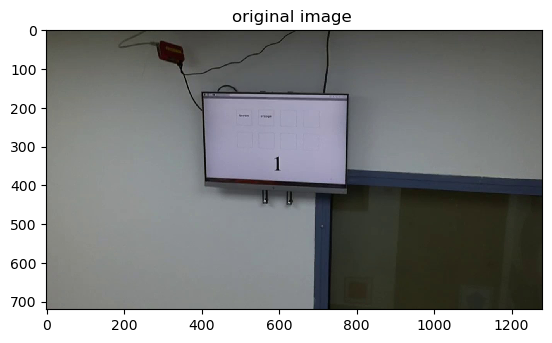

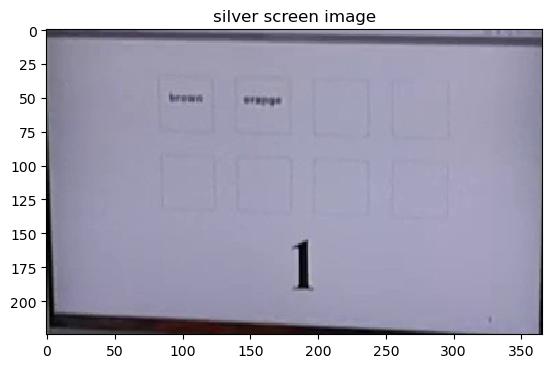

In [5]:
file_full_path = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\Simon_Resources\pics_from_tello_pov\frame106.jpg"
img = cv2.imread(file_full_path)
#PlotCv2ImageWithPlt(img, "original image "+ str(file_name))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=800 # 1200
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
i = 0;
print(f"number of detected contours is: {len(Contours)}")
for contour in Contours:
    (xc,yc,w,h) = cv2.boundingRect(contour)
    
    if (w > 200) and (h >200) and (yc > 1) and (xc > 1) and (1.8*h>w>1.3*h) and (xc + w < 1279) and (yc +h < 719):
        i += 1
        print (f"xc {xc}, yc {yc}, w {w}, h {h}")
        cropped_image = img[yc:yc+h,xc:xc+w]                     
        if i==1 :
            bb = (0,0,0,0)
        print(np.abs(xc+yc+w+h-bb[0]-bb[1]-bb[2]-bb[3]))
        if np.abs(xc+yc+w+h-bb[0]-bb[1]-bb[2]-bb[3]) > 150:
            bb = (xc,yc,w,h)
            #color_tuple = get_dominant_color(file_full_path, bb)
            color_tuple = get_dominant_color2(cropped_image, bb)
            #PlotCv2ImageWithPlt(img, "original image ")
            #PlotCv2ImageWithPlt(cropped_image, "screen image")
            print(color_tuple)
            print(GetColorName(color_tuple))
            if DistanceBetweenTwoTuples(color_tuple , (0,0,0)) <= 60:
                print("black screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "black screen image")                
            if DistanceBetweenTwoTuples(color_tuple , (170,170,170)) <= 60:
                print("silver screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "silver screen image")
            if DistanceBetweenTwoTuples(color_tuple , (200,0,0)) <= 60:
                print("red screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "red screen image")
            if DistanceBetweenTwoTuples(color_tuple , (20,70,20)) <= 60:
                print("green screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "green screen image")


In [12]:
img.shape

(720, 1280, 3)

In [170]:
pip install pytesseract

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.


number of detected contours is: 319
xc 569, yc 227, w 615, h 348


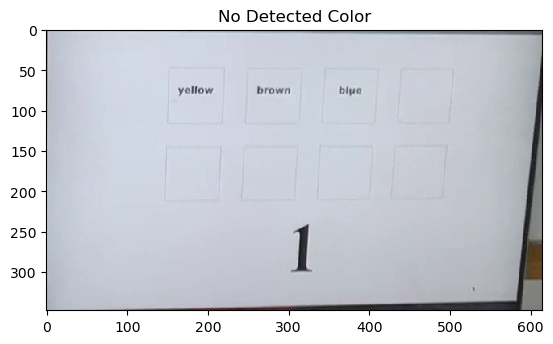

1759
Color of shape [209, 215, 228]
Color of shape gainsboro
xc 560, yc 199, w 634, h 394


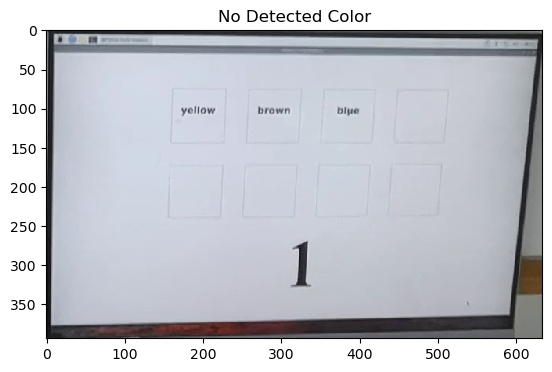

28


In [212]:
file_full_path = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\Simon_Resources\pics_from_tello_pov\frame158.jpg"
img = cv2.imread(file_full_path)
#PlotCv2ImageWithPlt(img, "original image "+ str(file_name))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=800 # 1200
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
i = 0;
print(f"number of detected contours is: {len(Contours)}")
for contour in Contours:
    (xc,yc,w,h) = cv2.boundingRect(contour)
    cropped_image = img[yc:yc+h,xc:xc+w] 
    #PlotCv2ImageWithPlt(cropped_image)    
    if (w > 200) and (h >200) and (yc > 1) and (xc > 1) and (1.8*h>w>1.3*h) and (xc + w < 1279) and (yc +h < 719):
        i += 1
        print (f"xc {xc}, yc {yc}, w {w}, h {h}")
        cropped_image = img[yc:yc+h,xc:xc+w] 
        PlotCv2ImageWithPlt(cropped_image, "No Detected Color")
        if i==1 :
            bb = (0,0,0,0)
        print(np.abs(xc+yc+w+h-bb[0]-bb[1]-bb[2]-bb[3]))
        if np.abs(xc+yc+w+h-bb[0]-bb[1]-bb[2]-bb[3]) > 150:
            cropped_image_det = img[yc:yc+h,xc:xc+w] 
            bb = (xc,yc,w,h)
            #color_tuple = get_dominant_color(file_full_path, bb)
            color_tuple = get_dominant_color2(cropped_image_det, bb)
            #PlotCv2ImageWithPlt(img, "original image ")
            #PlotCv2ImageWithPlt(cropped_image, "screen image")
            print(f"Color of shape {color_tuple}")
            print(f"Color of shape {GetColorName(color_tuple)}")
            if DistanceBetweenTwoTuples(color_tuple , (0,0,0)) <= 60:
                print("black screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image_det, "black screen image")                
            if DistanceBetweenTwoTuples(color_tuple , (170,170,170)) <= 60:
                print("silver screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image_det, "silver screen image")
            if DistanceBetweenTwoTuples(color_tuple , (200,0,0)) <= 60:
                print("red screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image_det, "red screen image")
            if DistanceBetweenTwoTuples(color_tuple , (20,70,20)) <= 60:
                print("green screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image_det, "green screen image")

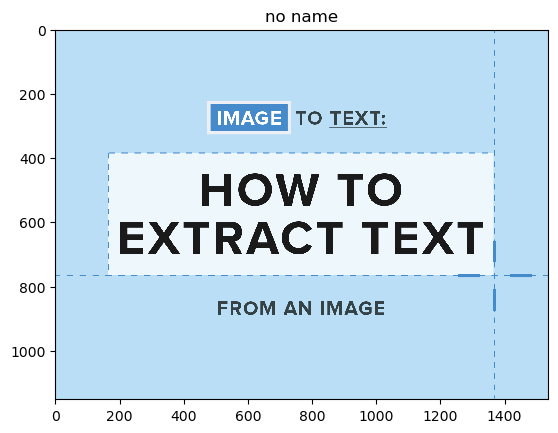

eee |

FROM AN IMAGE |



In [216]:
txt_file_full_path = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\image_wit_text.png"
img = cv2.imread(txt_file_full_path)
PlotCv2ImageWithPlt(img)
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
text = pytesseract.image_to_string(img)
print(text)

In [214]:
text

''